# `geom_band()`

In [1]:
from lets_plot import *


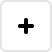
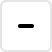
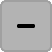
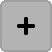
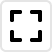
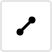
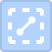
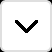
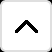
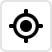
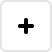
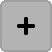
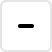
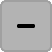
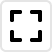
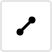
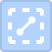
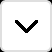
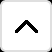
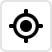

In [2]:
LetsPlot.setup_html()

## Default

In [3]:
ggplot() + geom_band(xmin=-1, xmax=1)

## Both vertical and horizontal

In [4]:
ggplot() + \
    geom_band(aes(
        xmin=[-1.5, .5],
        xmax=[-.5, 1.5],
    )) + \
    geom_band(aes(
        ymin=[-1.5, .5],
        ymax=[-.5, 1.5],
    ))

## Additional parameters

In [5]:
ggplot() + \
    geom_band(aes(
        xmin=[-1, 0],
        xmax=[0, 1],
        fill=["a", "b"],
    ), size=3, alpha=.5, linetype='dashed', show_legend=False)

In [6]:
# stat

data = {
    'x': ['a', 'a', 'a', 'b', 'b', 'b'],
    'y': [1, 2, 3, 4, 5, 6],
}

ggplot(data, aes('x', 'y')) + geom_band(aes(fill='x'), stat='boxplot')

In [7]:
# position

ggplot() + geom_band(aes(xmin=[-1], xmax=[1]), position=position_nudge(x=1)) + xlim(-1, 3)

In [8]:
# sampling

n = 20
ggplot() + geom_band(aes(xmin=list(range(n)), xmax=list(range(1, 1+n)), fill=list(range(n))), size=0, sampling=sampling_random(n-1, seed=42))

In [9]:
ggplot() + \
    geom_band(aes(xmin=[-3, 1], xmax=[-1, 3], paint_a=['a', 'b'], paint_b=['A', 'B']), \
              color_by='paint_a', fill_by='paint_b', size=1.5) + \
    scale_brewer('paint_a', palette='Set2') + \
    scale_brewer('paint_b', palette='Pastel2')

## Tooltips

In [10]:
data = {
    'xstart': [ 0,  2,  3,    6, None],
    'xend':   [ 1,  4,  5,    7, None],
    'y_from': [-1, -4, -5, None,   -9],
    'y_to':   [ 0, -2, -3, None,   -8],
    'color':  ["black", "red", "blue", "green", "yellow"],
}

p1 = ggplot(data, aes(xmin='xstart', xmax='xend'))
p2 = ggplot(data, aes(ymin='y_from', ymax='y_to'))

gggrid([
    p1 + geom_band(aes(fill='color'), alpha=.2) + scale_fill_identity(),
    p2 + geom_band(aes(fill='color'), alpha=.2) + scale_fill_identity(),
    p1 + geom_band(tooltips='none'),
    p1 + geom_band(tooltips=layer_tooltips().line("min|^xmin").line("max|^xmax").line("color|@color")),
], ncol=2)

## Different coordinate systems

In [11]:
limits = [-4.25, 4.25]

p = ggplot({'xmin': [-4, -2.5, -1, 1.5, 3], \
            'xmax': [-3, -1.5, 1, 2.5, 4], \
            'ymin': [-4, -1, 3, None, None], \
            'ymax': [-3, 1, 4, None, None]}) + \
    geom_band(aes(xmin='xmin', xmax='xmax'), alpha=.2, size=0, fill="red") + \
    geom_band(aes(ymin='ymin', ymax='ymax'), alpha=.2, size=0, fill="blue")

gggrid([
    p + ggtitle("Default coord"),
    p + coord_flip(xlim=limits, ylim=limits) + ggtitle("coord_flip()"),
    p + coord_fixed(xlim=limits, ylim=limits) + ggtitle("coord_fixed()"),
    p + coord_polar(xlim=limits, ylim=limits) + ggtitle("coord_polar()"),
], ncol=2)

In [12]:
# See: https://gadflyjl.org/stable/gallery/geometries/#[Geom.band](@ref),-[Geom.hband](@ref),-[Geom.vband](@ref)

import pandas as pd

presidential_df = pd.read_csv("../../f-24e/data/presidential.csv", parse_dates=["start", "end"])
economics_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/economics.csv", parse_dates=["date"])

ggplot() + \
    geom_band(aes(xmin="start", xmax="end", fill="party"), data=presidential_df, size=0, alpha=.4) + \
    geom_line(aes("date", "unemploy"), data=economics_df) + \
    scale_y_continuous(trans='log10') + \
    ggsize(1000, 200)

## Tests

### Boundary Value Analysis

In [13]:
import numpy as np

class BVATest:
    def __init__(self, data, title, orientation='x', show=True):
        self.data = data
        self.title = title
        self.orientation = orientation
        self.show = show

    def to_plot(self):
        min_aes, max_aes = '{0}min'.format(self.orientation), '{0}max'.format(self.orientation)
        return ggplot(self.data) + geom_band(aes(**{min_aes: min_aes, max_aes: max_aes})) + \
            ggtitle(self.title)

show_all = True
bva_tests = [
    BVATest(
        data=dict(
            xmin=[],
            xmax=[],
        ),
        title="Empty dataset",
    ),
    BVATest(
        data=dict(
            xmin=[-1],
            xmax=[1],
        ),
        title="One value",
    ),
    BVATest(
        data=dict(
            xmin=[0],
            xmax=[0],
        ),
        title="min=max",
    ),
    BVATest(
        data=dict(
            xmin=[1],
            xmax=[-1],
        ),
        title="min>max",
    ),
    BVATest(
        data=dict(
            xmin=[-1, 0],
            xmax=[0, 1],
        ),
        title="Joint bands",
    ),
    BVATest(
        data=dict(
            xmin=[-2, -1],
            xmax=[1, 2],
        ),
        title="Intersected bands",
    ),
    BVATest(
        data=dict(
            ymin=[-1],
            ymax=[1],
        ),
        orientation='y',
        title="y-oriented",
    ),
    BVATest(
        data=dict(
            xmin=[-1, float('inf'), float('-inf'), -2, -3],
            xmax=[1, 3, 2, float('-inf'), float('inf')],
        ),
        title="Inf value",
    ),
    BVATest(
        data=dict(
            xmin=[-1, None, -2],
            xmax=[1, 2, None],
        ),
        title="None value",
    ),
    BVATest(
        data=dict(
            xmin=[-1, np.nan, -2],
            xmax=[1, 2, np.nan],
        ),
        title="np.nan value",
    ),
]

gggrid([
    t.to_plot()
    for t in filter(lambda t: show_all or t.show, bva_tests)
], ncol=3)

### Regression Testing

In [14]:
# Only zoom without clipping saves the band, if it's half-visible

data = dict(xmin=[0], xmax=[2])
lims = [-1, 1]

gggrid([
    ggplot(data) + geom_band(aes(xmin='xmin', xmax='xmax')) + xlim(*lims),
    ggplot(data) + geom_band(aes(xmin='xmin', xmax='xmax')) + coord_cartesian(xlim=lims),
])